
# WeatherPy

Observation 1: Southern Hemisphere climates tend to be slightly milder than those at similar latitudes in the Northern Hemisphere. This is because teh Southern Hemisphere has significantly more ocean and much less land; water heats up and cools down more slowly than land.

Observation 2: Highest temperature is found at 0 latituted and as the latitude increases or decreases, temperature drops. This happens as equatorial region receives sunlight straight with less or no angle due to curvature shape of the earth.

Observation 3: Latitude doesn't have a storng influence on wind speed. The speed of the wind is controlled by the strength of the air pressure gradient, the stonger the pressure gradient the higher the higher the wind speed.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import datetime
from datetime import date

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for lat_lngs, cities
lat_lngs = []
cities = []

# Random lat and lng combos
lats = np.random.uniform(lat_range[0], lat_range[1], size=200)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=200)
lat_lngs = zip(lats, lngs)

# Narest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print city count
len(cities)


143

In [3]:
#Create lists
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# For each city name in cities list, do the following...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response['name'])
        cloudiness_list.append(response['clouds']['all'])
        country_list.append(response['sys']['country'])
        date_list.append(response["dt"])
        humidity_list.append(response['main']['humidity'])
        lat_list.append(response['coord']['lat'])
        lng_list.append(response['coord']['lon'])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response['wind']['speed'])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        else:
            index_counter = index_counter + 1
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
    
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : cidreira
City not found. Skipping...
Processing Record 2 of Set 1 : natchez
Processing Record 3 of Set 1 : salalah
Processing Record 4 of Set 1 : saldanha
Processing Record 5 of Set 1 : walvis bay
Processing Record 6 of Set 1 : yellowknife
Processing Record 7 of Set 1 : nikolskoye
Processing Record 8 of Set 1 : port alfred
Processing Record 9 of Set 1 : new norfolk
Processing Record 10 of Set 1 : cape town
City not found. Skipping...
Processing Record 11 of Set 1 : ushuaia
Processing Record 12 of Set 1 : mataura
Processing Record 13 of Set 1 : rikitea
Processing Record 14 of Set 1 : xuddur
Processing Record 15 of Set 1 : khatanga
Processing Record 16 of Set 1 : killybegs
Processing Record 17 of Set 1 : kushima
Processing Record 18 of Set 1 : sosnovo-ozerskoye
Processing Record 19 of Set 1 : codrington
Processing Record 20 of Set 1 : vila
Processing Record 21 of Set 1 : oranjemund
Processing Record 22

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create initial dictionary with API calls
weather_dict = pd.DataFrame ({"City":city_name_list,
                            "Cloudiness":cloudiness_list,
                            "Country" : country_list,
                            "Date" : date_list,
                            "Humidity":humidity_list,
                            "Lat":lat_list,
                            "Lng":lng_list,
                            "Max Temp":max_temp_list,
                            "Wind Speed":wind_speed_list})

In [6]:
weather_dict.count()
# Display the Data Frame
weather_dict
weather_dict.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,135.000000,1.350000e+02,135.000000,135.000000,135.000000,135.000000,135.000000
mean,58.955556,1.607807e+09,75.029630,10.552963,11.522963,53.625556,9.337630
std,39.097823,1.992943e+02,17.342012,37.895164,98.225910,30.366197,6.737549
min,0.000000,1.607807e+09,14.000000,-54.800000,-175.200000,-40.830000,0.600000
25%,20.000000,1.607807e+09,67.500000,-22.470000,-70.140000,43.700000,3.805000
50%,75.000000,1.607807e+09,78.000000,10.250000,16.920000,62.600000,8.050000
75%,97.000000,1.607807e+09,86.500000,41.700000,107.285000,75.400000,13.000000
max,100.000000,1.607807e+09,100.000000,77.480000,178.420000,89.600000,32.750000


In [7]:
# Save city data into a csv file
weather_dict.to_csv("cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
dry_cities = weather_dict[weather_dict["Humidity"]<=100]
dry_cities.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,135.000000,1.350000e+02,135.000000,135.000000,135.000000,135.000000,135.000000
mean,58.955556,1.607807e+09,75.029630,10.552963,11.522963,53.625556,9.337630
std,39.097823,1.992943e+02,17.342012,37.895164,98.225910,30.366197,6.737549
min,0.000000,1.607807e+09,14.000000,-54.800000,-175.200000,-40.830000,0.600000
25%,20.000000,1.607807e+09,67.500000,-22.470000,-70.140000,43.700000,3.805000
50%,75.000000,1.607807e+09,78.000000,10.250000,16.920000,62.600000,8.050000
75%,97.000000,1.607807e+09,86.500000,41.700000,107.285000,75.400000,13.000000
max,100.000000,1.607807e+09,100.000000,77.480000,178.420000,89.600000,32.750000


In [9]:
#  Get the indices of cities that have humidity over 100%.
high_humid = weather_dict.index[weather_dict["Humidity"]>100].tolist()

print(f"There are {len(high_humid)} cities with over 100% humidity")

There are 0 cities with over 100% humidity


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_dict.drop(labels=high_humid,inplace=False)
clean_city_data.head()
clean_city_data.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,135.000000,1.350000e+02,135.000000,135.000000,135.000000,135.000000,135.000000
mean,58.955556,1.607807e+09,75.029630,10.552963,11.522963,53.625556,9.337630
std,39.097823,1.992943e+02,17.342012,37.895164,98.225910,30.366197,6.737549
min,0.000000,1.607807e+09,14.000000,-54.800000,-175.200000,-40.830000,0.600000
25%,20.000000,1.607807e+09,67.500000,-22.470000,-70.140000,43.700000,3.805000
50%,75.000000,1.607807e+09,78.000000,10.250000,16.920000,62.600000,8.050000
75%,97.000000,1.607807e+09,86.500000,41.700000,107.285000,75.400000,13.000000
max,100.000000,1.607807e+09,100.000000,77.480000,178.420000,89.600000,32.750000


In [11]:
date = date.today()


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Lat_Temp.png'

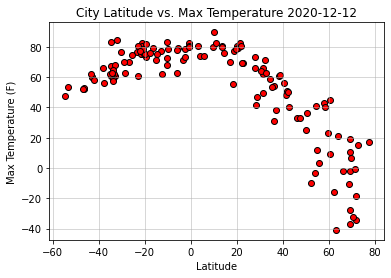

In [12]:

# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "red", edgecolor = "black")

# Set title
plt.title(f"City Latitude vs. Max Temperature {date}")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle="-", linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("output_data/Lat_Temp.png")

## Latitude vs. Humidity Plot

In [ ]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "orange", edgecolor = "black")

# Set title
plt.title(f"City Latitude vs. Humidity {date}")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle="-", linewidth=1, alpha = 0.5)

# Save the plotted figure as png
plt.savefig("output_data/Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

In [ ]:

# Create a Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "yellow", edgecolor= "black")

# Set title
plt.title(f"City Latitude vs Cloudiness {date}")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Cloudiness")

# Set grid line
plt.grid(linestyle="-", linewidth=1, alpha = 0.5)

# Save the plotted figure as png
plt.savefig("output_data/Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

In [ ]:
# Create Latitude vs. Wind Speed Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor ="green", edgecolor = "black")

# Set title
plt. title(f"City Latitude vs. Wind Speed (mph) {date}")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle="-", linewidth=1, alpha =0.5)

# Save the plotted figure as png
plt.savefig("output_data/Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [ ]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lng"] < 0]

# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r squared is : {round(st.pearsonr(x,y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) =  linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a function for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15, color ="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# Call on function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call on function #2
annotate(equation, 0, 0)

#Set a title#
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

#Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure as png
plt.savefig("output_data/Images/Northern Hemisphere - Max Temp vs Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# Call on function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call on function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure as png
plt.savefig("output_data/Images/Southern Hemisphere - Max Temp vs Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Call on function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call on function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere = Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Images/Northern Hemisphere - Humidity (%) vs Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Call on function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call on function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemishpere = Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure in png
plt.savefig("output_data/Images/Southern Hemisphere - Humidity (%) vs Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Call on function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call on function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemishpere - Cloudiness (%) vs Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure as a png
plt.savefig("output_data/Images/Northern Hemisphere - Cloudiness (%) vs Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Call function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call on function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure as png
plt.savefig("output_data/Images/Southern Hemisphere - Cloudiness (%) vs Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("output_data/Images/Northern Hemisphere - Wind Speed vs Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("output_data/Images/Southern Hemisphere - Wind Speed vs Latitude Linear Regression.png")

In [ ]:
#Observations